In [89]:
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
plt.style.use('seaborn')
import scipy
from scipy import stats

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

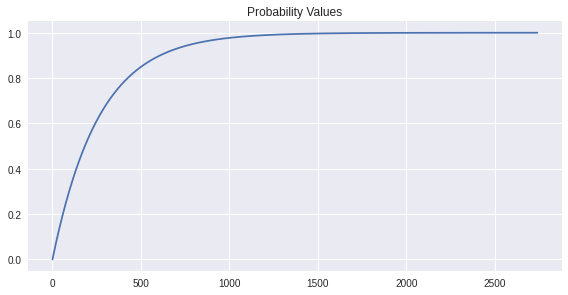

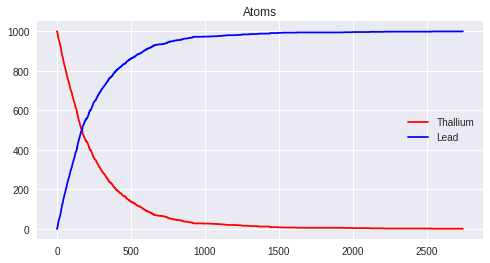

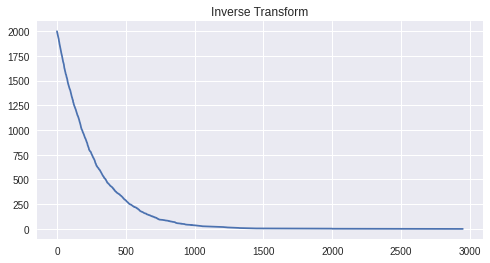

In [90]:
def cd(t,tao): #cdf
  return 1-2**(-t/tao)

def pd(t,tao): #pdf
  return 2**((-t/tao)*math.log(2)/tao)

def icd(x,tao): #inverse cdf
  return -tao*np.log2(1 - x)

tao=3.052*60
num=2000
th=1000
pb=0
num_tl=[th]
num_le=[pb]
times=[]
x_prob=[]
atoms = np.random.random(size=th)
t=0

while(th != 0):
    x=cd(t,tao)
    atoms = atoms[atoms>x]
    th = len(atoms)
    pb = 1000 - th
    num_tl.append(th)
    num_le.append(pb)
    times.append(t)
    x_prob.append(x)
    t += 1

plt.figure(figsize=(8,4))
plt.plot(x_prob)
plt.tight_layout()
plt.title('Probability Values')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(num_tl, label="Thallium", c='r')
plt.plot(num_le, label="Lead", c='b')
plt.legend()
plt.title('Atoms')
plt.show()

nums = np.random.random(num)
x = icd(nums, tao)
decay = np.sort(x)[::-1]
x2 = np.arange(0,len(decay),1)

plt.figure(figsize=(8,4))
plt.plot(decay,x2)
plt.title('Inverse Transform')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

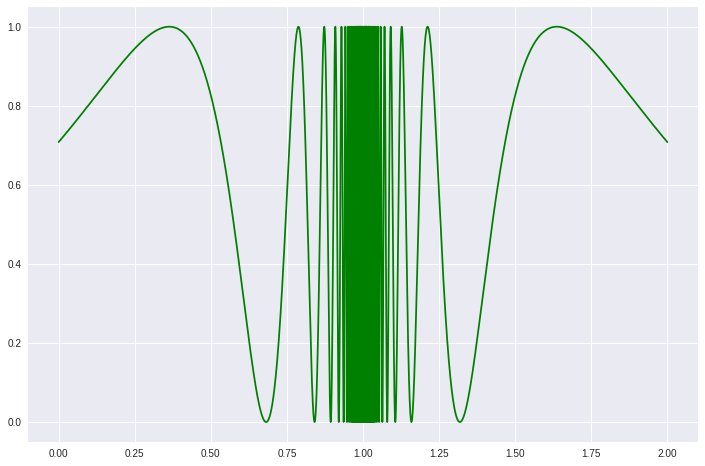


Mean of integral of f(x) with hit and miss method: 1.3470346
Standard Deviation of integral of f(x) with hit and miss method: 0.0002808246221398685

Mean of integral of f(x) with mean value method: 1.3457870198465154
Standard Deviation of integral of f(x) with mean value method: 0.0010346985295140068

Error with hit and miss method: 0.0002576209056386336
Error with mean value method: 0.0009899592478459507

The hit-miss method is more accurate


In [92]:
def f(x):
    return (np.sin(1. / (1 - x)))**2

N = 100000
x=np.linspace(0, 2, N)
plt.figure(figsize=(12,8))
plt.plot(x, f(x), 'g-')
plt.show()

ints1=[]
n2=100
for a in range(n2): # repeat the integral 100 times
    count = 0 
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = 2 * count / N
    ints1.append(I)

print("\nMean of integral of f(x) with hit and miss method:", np.mean(ints1))
print("Standard Deviation of integral of f(x) with hit and miss method:", np.std(ints1)/np.sqrt(n2))

x_mv = np.random.uniform(0, 2, N)
y_mv = f(x_mv)

print("\nMean of integral of f(x) with mean value method:", 2*np.mean(y_mv))
print("Standard Deviation of integral of f(x) with mean value method:", np.std(y_mv)/np.sqrt(N))

x = np.linspace(0, 2, N)
Integral_ref = np.trapz(f(x) ,x)

err_hitmiss = np.abs(Integral_ref-np.mean(ints1))
err_meanval = np.abs(Integral_ref-2*np.mean(y_mv))

print("\nError with hit and miss method:", err_hitmiss)
print("Error with mean value method:", err_meanval)

if(err_meanval > err_hitmiss):
    print("\nThe hit-miss method is more accurate")
else: 
    print("\nThe mean value method is more accurate")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [93]:
def volume(dim,N):
    V = 2**dim
    count = 0
    for i in range(N):
        x = (2*np.random.uniform(size=dim))-1
        norm = np.linalg.norm(x)
        if (norm <= 1):
            count +=1
    I = V * count / N
    return I

N=100000
V2 = volume(2,N)
print("The area of the circle is:", V2)  

V10 = volume(10,N)
print("The volume of the 10D sphere is:", V10) 

The area of the circle is: 3.14028
The volume of the 10D sphere is: 2.42688


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

The integral value is  0.8376541889704151
We should expect a result around 0.84.



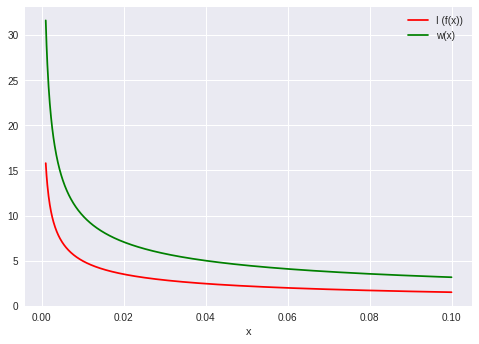

In [94]:
def f(x):
  return (x**(-1/2))/(np.exp(x) + 1)

def w(x):
  return 1/np.sqrt(x)

N = 100000
x = np.random.random(N)
integral = np.sum(w(x))/N
x1 = np.random.uniform(0, 1, N)**2
result = (np.sum(f(x1)/w(x1))*integral)/N
print("The integral value is ", result)
print("We should expect a result around 0.84.\n")

xs = np.linspace(0.001, 0.1, 1000)
fig = plt.figure()
plt.plot(xs, f(xs), label='I (f(x))', c='r')
plt.plot(xs, w(xs), label='w(x)', c='g')
plt.xlabel('x')
plt.legend();